<a href="https://colab.research.google.com/github/roshansadath/COMP6721-AppliedAI/blob/main/Hyperparameter%20Tuning/AlexNet_Harvard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [ ]:
import os, time, random, torch, warnings
import numpy as np
from PIL import Image
import torch.nn as nn
from tqdm import tqdm
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import precision_score, recall_score, f1_score

warnings.filterwarnings("ignore", category=UserWarning)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
data_path = "/content/drive/MyDrive/Harvard_Chest_XRay/"
#data_path = "drive/My Drive/NIH_Chest_XRay/"
#data_path = "drive/My Drive/Simple_Chest_XRay/"

sample_ratio = 0.4
batch_size = 128
num_epochs = 15

In [ ]:
# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

In [ ]:
def save_metrics(loss, accuracy, model):
  np.save("{}{}_train_loss.npy".format(data_path, model), loss)
  np.save("{}{}_train_accuracy.npy".format(data_path, model), accuracy)

**DATA PREPROCESSING**

In [ ]:
%run "/content/drive/MyDrive/Colab Notebooks/utils.ipynb"
dataset, train_loader, train_indices, test_loader, test_indices, val_loader, val_indices = data_preprocess(data_path, sample_ratio)

**MODEL TRAINING**

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip


Training Model 1 with Learning Rate = 0.005, Batch Size = 128, Number of Epochs = 15


Epoch 1/15: 100%|██████████| 72/72 [11:05<00:00,  9.25s/batch, Accuracy=0.285, Loss=2.95e+3, Precision=0.205, Recall=0.204, F1 Score=0.169]


VALIDATION: Accuracy: 0.3127 | Loss: 1.5443 | Recall: 0.2000 | Precision: 0.0626 | F-score: 0.0953



Epoch 2/15: 100%|██████████| 72/72 [00:31<00:00,  2.27batch/s, Accuracy=0.358, Loss=1.5, Precision=0.239, Recall=0.235, F1 Score=0.197]


VALIDATION: Accuracy: 0.3662 | Loss: 1.5026 | Recall: 0.2570 | Precision: 0.2804 | F-score: 0.1832



Epoch 3/15: 100%|██████████| 72/72 [00:36<00:00,  1.99batch/s, Accuracy=0.385, Loss=1.47, Precision=0.258, Recall=0.255, F1 Score=0.217]


VALIDATION: Accuracy: 0.3899 | Loss: 1.4648 | Recall: 0.3029 | Precision: 0.2388 | F-score: 0.2466



Epoch 4/15: 100%|██████████| 72/72 [00:34<00:00,  2.10batch/s, Accuracy=0.4, Loss=1.45, Precision=0.267, Recall=0.268, F1 Score=0.229]


VALIDATION: Accuracy: 0.3869 | Loss: 1.4634 | Recall: 0.3093 | Precision: 0.2289 | F-score: 0.2501



Epoch 5/15: 100%|██████████| 72/72 [00:38<00:00,  1.89batch/s, Accuracy=0.401, Loss=1.45, Precision=0.271, Recall=0.277, F1 Score=0.236]


VALIDATION: Accuracy: 0.4067 | Loss: 1.4663 | Recall: 0.3048 | Precision: 0.2529 | F-score: 0.2543



Epoch 6/15: 100%|██████████| 72/72 [00:41<00:00,  1.75batch/s, Accuracy=0.424, Loss=1.41, Precision=0.279, Recall=0.286, F1 Score=0.245]


VALIDATION: Accuracy: 0.3899 | Loss: 1.4417 | Recall: 0.3241 | Precision: 0.2324 | F-score: 0.2657



Epoch 7/15: 100%|██████████| 72/72 [00:40<00:00,  1.76batch/s, Accuracy=0.429, Loss=1.4, Precision=0.29, Recall=0.294, F1 Score=0.253]


VALIDATION: Accuracy: 0.4182 | Loss: 1.4146 | Recall: 0.3466 | Precision: 0.3651 | F-score: 0.2902



Epoch 8/15: 100%|██████████| 72/72 [00:42<00:00,  1.70batch/s, Accuracy=0.437, Loss=1.38, Precision=0.302, Recall=0.301, F1 Score=0.26]


VALIDATION: Accuracy: 0.4167 | Loss: 1.4051 | Recall: 0.3510 | Precision: 0.3595 | F-score: 0.2967



Epoch 9/15: 100%|██████████| 72/72 [00:45<00:00,  1.59batch/s, Accuracy=0.458, Loss=1.35, Precision=0.312, Recall=0.308, F1 Score=0.267]


VALIDATION: Accuracy: 0.4228 | Loss: 1.3780 | Recall: 0.3425 | Precision: 0.3355 | F-score: 0.3004



Epoch 10/15: 100%|██████████| 72/72 [00:47<00:00,  1.52batch/s, Accuracy=0.462, Loss=1.33, Precision=0.324, Recall=0.315, F1 Score=0.274]


VALIDATION: Accuracy: 0.4427 | Loss: 1.3748 | Recall: 0.3464 | Precision: 0.5081 | F-score: 0.2897



Epoch 11/15: 100%|██████████| 72/72 [00:46<00:00,  1.54batch/s, Accuracy=0.466, Loss=1.32, Precision=0.336, Recall=0.32, F1 Score=0.28]


VALIDATION: Accuracy: 0.4427 | Loss: 1.3565 | Recall: 0.3583 | Precision: 0.4294 | F-score: 0.3250



Epoch 12/15: 100%|██████████| 72/72 [00:47<00:00,  1.50batch/s, Accuracy=0.468, Loss=1.32, Precision=0.352, Recall=0.326, F1 Score=0.286]


VALIDATION: Accuracy: 0.4580 | Loss: 1.3298 | Recall: 0.3756 | Precision: 0.4446 | F-score: 0.3473



Epoch 13/15: 100%|██████████| 72/72 [00:52<00:00,  1.38batch/s, Accuracy=0.472, Loss=1.3, Precision=0.359, Recall=0.33, F1 Score=0.292]


VALIDATION: Accuracy: 0.4855 | Loss: 1.2856 | Recall: 0.4211 | Precision: 0.4682 | F-score: 0.4152



Epoch 14/15: 100%|██████████| 72/72 [00:55<00:00,  1.29batch/s, Accuracy=0.479, Loss=1.29, Precision=0.367, Recall=0.335, F1 Score=0.297]


VALIDATION: Accuracy: 0.4488 | Loss: 1.3497 | Recall: 0.3737 | Precision: 0.4736 | F-score: 0.3496



Epoch 15/15: 100%|██████████| 72/72 [00:56<00:00,  1.27batch/s, Accuracy=0.481, Loss=1.28, Precision=0.373, Recall=0.339, F1 Score=0.303]


VALIDATION: Accuracy: 0.4717 | Loss: 1.3011 | Recall: 0.4032 | Precision: 0.4789 | F-score: 0.3845

[2945.5170801980235, 1.4991308027584687, 1.4668543679429435, 1.4535199992579328, 1.4533557245319964, 1.4060080657173617, 1.3961015588506924, 1.3766627189123282, 1.3466792230384101, 1.3302823586641614, 1.3247642640063912, 1.318544027779535, 1.299076561393171, 1.2899389937332766, 1.2804149573337262] [1.5443239252137118, 1.5025679062630424, 1.464796141017832, 1.4634101132004997, 1.4662540819302248, 1.4417107232849167, 1.4146021888890397, 1.4051236873008424, 1.3779532016235025, 1.3748070249499167, 1.3565420061805562, 1.3297644241140523, 1.2855600869619153, 1.3496585789076778, 1.3011009448894302]


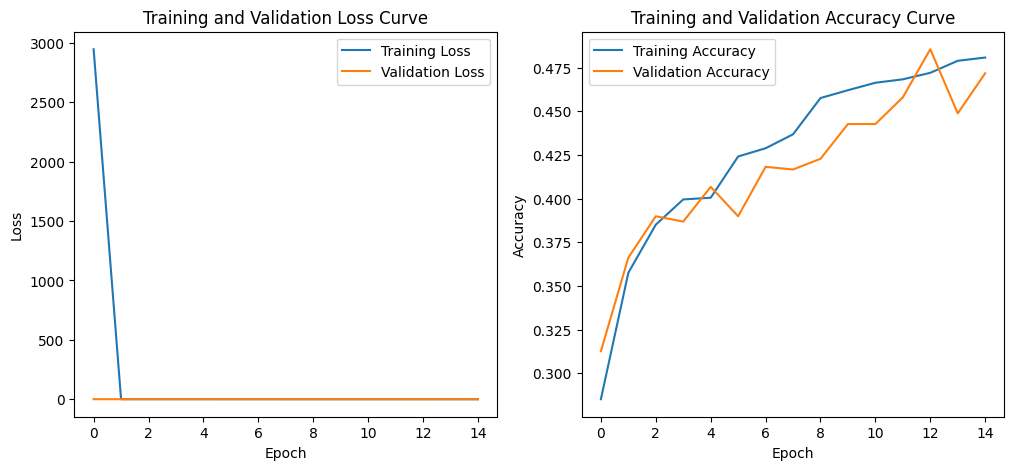

TEST: Accuracy: 0.4881 | Loss: 1.2743 | Recall: 0.4185 | Precision: 0.4860 | F-score: 0.3967



<Figure size 800x800 with 0 Axes>

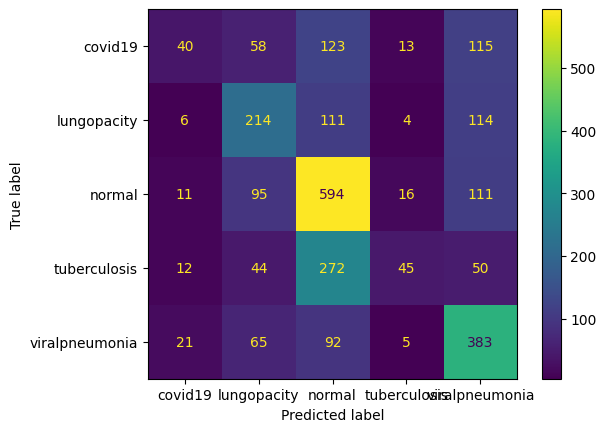

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Training Model 2 with Learning Rate = 0.0001, Batch Size = 128, Number of Epochs = 15


Epoch 1/15: 100%|██████████| 72/72 [00:32<00:00,  2.22batch/s, Accuracy=0.413, Loss=1.39, Precision=0.339, Recall=0.305, F1 Score=0.264]


VALIDATION: Accuracy: 0.5069 | Loss: 1.1938 | Recall: 0.4026 | Precision: 0.3122 | F-score: 0.3443



Epoch 2/15: 100%|██████████| 72/72 [00:34<00:00,  2.11batch/s, Accuracy=0.549, Loss=1.09, Precision=0.457, Recall=0.379, F1 Score=0.353]


VALIDATION: Accuracy: 0.5657 | Loss: 1.0631 | Recall: 0.4737 | Precision: 0.5743 | F-score: 0.4461



Epoch 3/15: 100%|██████████| 72/72 [00:34<00:00,  2.08batch/s, Accuracy=0.614, Loss=0.978, Precision=0.518, Recall=0.437, F1 Score=0.434]


VALIDATION: Accuracy: 0.6414 | Loss: 0.9446 | Recall: 0.6001 | Precision: 0.6447 | F-score: 0.6117



Epoch 4/15: 100%|██████████| 72/72 [00:37<00:00,  1.90batch/s, Accuracy=0.663, Loss=0.869, Precision=0.557, Recall=0.483, F1 Score=0.489]


VALIDATION: Accuracy: 0.6705 | Loss: 0.8227 | Recall: 0.6143 | Precision: 0.6926 | F-score: 0.6219



Epoch 5/15: 100%|██████████| 72/72 [00:36<00:00,  1.96batch/s, Accuracy=0.723, Loss=0.732, Precision=0.592, Recall=0.524, F1 Score=0.536]


VALIDATION: Accuracy: 0.7248 | Loss: 0.7260 | Recall: 0.7116 | Precision: 0.7254 | F-score: 0.7054



Epoch 6/15: 100%|██████████| 72/72 [00:39<00:00,  1.80batch/s, Accuracy=0.771, Loss=0.627, Precision=0.623, Recall=0.56, F1 Score=0.575]


VALIDATION: Accuracy: 0.7745 | Loss: 0.6172 | Recall: 0.7354 | Precision: 0.7880 | F-score: 0.7485



Epoch 7/15: 100%|██████████| 72/72 [00:42<00:00,  1.68batch/s, Accuracy=0.791, Loss=0.574, Precision=0.649, Recall=0.589, F1 Score=0.605]


VALIDATION: Accuracy: 0.7722 | Loss: 0.6348 | Recall: 0.7331 | Precision: 0.7956 | F-score: 0.7443



Epoch 8/15: 100%|██████████| 72/72 [00:43<00:00,  1.66batch/s, Accuracy=0.818, Loss=0.49, Precision=0.671, Recall=0.615, F1 Score=0.632]


VALIDATION: Accuracy: 0.8073 | Loss: 0.5395 | Recall: 0.7854 | Precision: 0.8083 | F-score: 0.7915



Epoch 9/15: 100%|██████████| 72/72 [00:44<00:00,  1.61batch/s, Accuracy=0.827, Loss=0.465, Precision=0.689, Recall=0.637, F1 Score=0.653]


VALIDATION: Accuracy: 0.8242 | Loss: 0.5020 | Recall: 0.7999 | Precision: 0.8324 | F-score: 0.8097



Epoch 10/15: 100%|██████████| 72/72 [00:47<00:00,  1.50batch/s, Accuracy=0.849, Loss=0.409, Precision=0.706, Recall=0.656, F1 Score=0.673]


VALIDATION: Accuracy: 0.8318 | Loss: 0.4604 | Recall: 0.8095 | Precision: 0.8356 | F-score: 0.8187



Epoch 11/15: 100%|██████████| 72/72 [00:49<00:00,  1.44batch/s, Accuracy=0.863, Loss=0.382, Precision=0.721, Recall=0.674, F1 Score=0.69]


VALIDATION: Accuracy: 0.8333 | Loss: 0.4723 | Recall: 0.8108 | Precision: 0.8353 | F-score: 0.8188



Epoch 12/15: 100%|██████████| 72/72 [00:52<00:00,  1.38batch/s, Accuracy=0.873, Loss=0.347, Precision=0.735, Recall=0.69, F1 Score=0.706]


VALIDATION: Accuracy: 0.8219 | Loss: 0.4811 | Recall: 0.7983 | Precision: 0.8282 | F-score: 0.8056



Epoch 13/15: 100%|██████████| 72/72 [00:52<00:00,  1.37batch/s, Accuracy=0.881, Loss=0.323, Precision=0.747, Recall=0.703, F1 Score=0.719]


VALIDATION: Accuracy: 0.8242 | Loss: 0.4644 | Recall: 0.8163 | Precision: 0.8256 | F-score: 0.8168



Epoch 14/15: 100%|██████████| 72/72 [00:54<00:00,  1.32batch/s, Accuracy=0.886, Loss=0.307, Precision=0.757, Recall=0.716, F1 Score=0.731]


VALIDATION: Accuracy: 0.8234 | Loss: 0.4793 | Recall: 0.8071 | Precision: 0.8294 | F-score: 0.8134



Epoch 15/15: 100%|██████████| 72/72 [00:58<00:00,  1.22batch/s, Accuracy=0.899, Loss=0.279, Precision=0.767, Recall=0.728, F1 Score=0.743]


VALIDATION: Accuracy: 0.8387 | Loss: 0.4231 | Recall: 0.8309 | Precision: 0.8290 | F-score: 0.8287

[1.3857609809337321, 1.0876886354823045, 0.9780893329778872, 0.8690161584127328, 0.7320598165639279, 0.6270784863538786, 0.574095811326443, 0.4898005891414226, 0.4648387548884672, 0.4093281216320998, 0.3819928234450193, 0.34689979162219836, 0.32269473846929736, 0.30656372833194634, 0.2792407258907025] [1.1937564983280426, 1.0630884319999532, 0.9445917420431015, 0.8226577931223295, 0.7259755068962727, 0.6171960611955836, 0.6348375690821842, 0.5394772214627047, 0.5019739808383703, 0.4603647479405826, 0.47232107093574804, 0.4810528098990064, 0.46444836340912987, 0.47931513691531774, 0.42307721556873495]


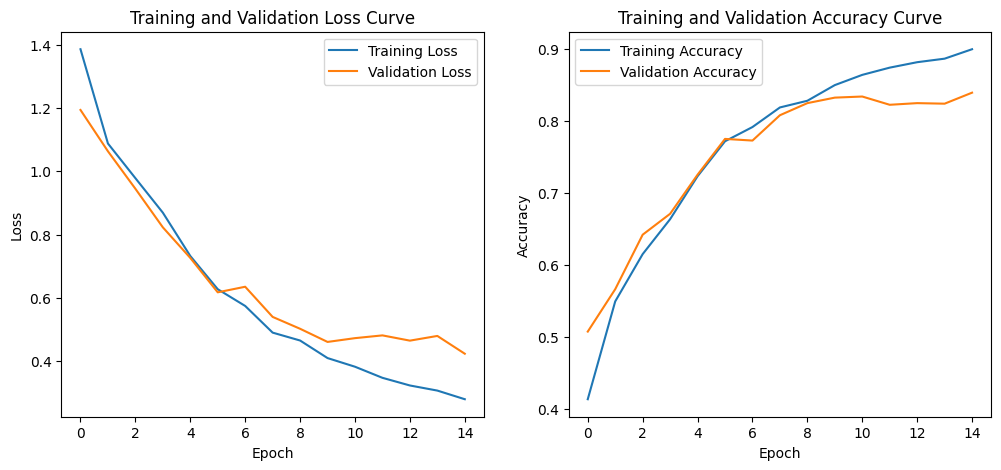

TEST: Accuracy: 0.8405 | Loss: 0.4373 | Recall: 0.8330 | Precision: 0.8334 | F-score: 0.8313



<Figure size 800x800 with 0 Axes>

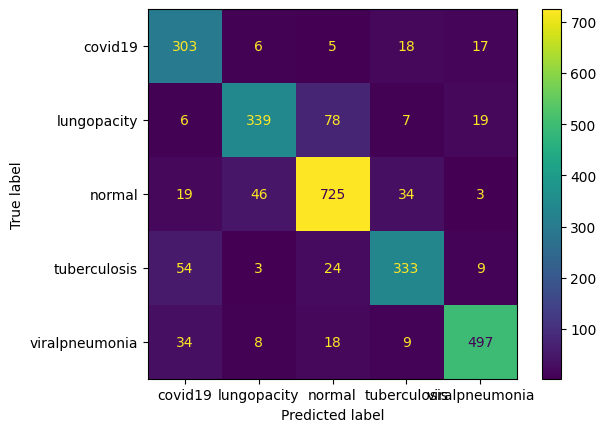

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Training Model 3 with Learning Rate = 0.0005, Batch Size = 128, Number of Epochs = 15


Epoch 1/15: 100%|██████████| 72/72 [00:31<00:00,  2.27batch/s, Accuracy=0.354, Loss=1.5, Precision=0.219, Recall=0.262, F1 Score=0.218]


VALIDATION: Accuracy: 0.4778 | Loss: 1.2885 | Recall: 0.3727 | Precision: 0.2974 | F-score: 0.3088



Epoch 2/15: 100%|██████████| 72/72 [00:34<00:00,  2.06batch/s, Accuracy=0.53, Loss=1.18, Precision=0.416, Recall=0.342, F1 Score=0.301]


VALIDATION: Accuracy: 0.5436 | Loss: 1.1115 | Recall: 0.4554 | Precision: 0.4762 | F-score: 0.4172



Epoch 3/15: 100%|██████████| 72/72 [00:33<00:00,  2.14batch/s, Accuracy=0.567, Loss=1.06, Precision=0.46, Recall=0.391, F1 Score=0.37]


VALIDATION: Accuracy: 0.5818 | Loss: 1.0199 | Recall: 0.5482 | Precision: 0.5734 | F-score: 0.5482



Epoch 4/15: 100%|██████████| 72/72 [00:37<00:00,  1.94batch/s, Accuracy=0.596, Loss=0.993, Precision=0.497, Recall=0.426, F1 Score=0.418]


VALIDATION: Accuracy: 0.6131 | Loss: 0.9652 | Recall: 0.5516 | Precision: 0.6226 | F-score: 0.5574



Epoch 5/15: 100%|██████████| 72/72 [00:36<00:00,  1.96batch/s, Accuracy=0.644, Loss=0.895, Precision=0.529, Recall=0.459, F1 Score=0.459]


VALIDATION: Accuracy: 0.6575 | Loss: 0.8976 | Recall: 0.6033 | Precision: 0.6656 | F-score: 0.6168



Epoch 6/15: 100%|██████████| 72/72 [00:41<00:00,  1.74batch/s, Accuracy=0.69, Loss=0.799, Precision=0.558, Recall=0.49, F1 Score=0.496]


VALIDATION: Accuracy: 0.7049 | Loss: 0.7955 | Recall: 0.7023 | Precision: 0.6894 | F-score: 0.6932



Epoch 7/15: 100%|██████████| 72/72 [00:43<00:00,  1.64batch/s, Accuracy=0.74, Loss=0.698, Precision=0.587, Recall=0.521, F1 Score=0.53]


VALIDATION: Accuracy: 0.7347 | Loss: 0.7043 | Recall: 0.6991 | Precision: 0.7323 | F-score: 0.7070



Epoch 8/15: 100%|██████████| 72/72 [00:42<00:00,  1.68batch/s, Accuracy=0.775, Loss=0.609, Precision=0.612, Recall=0.549, F1 Score=0.561]


VALIDATION: Accuracy: 0.7622 | Loss: 0.6669 | Recall: 0.7236 | Precision: 0.7644 | F-score: 0.7335



Epoch 9/15: 100%|██████████| 72/72 [00:45<00:00,  1.60batch/s, Accuracy=0.786, Loss=0.571, Precision=0.633, Recall=0.572, F1 Score=0.586]


VALIDATION: Accuracy: 0.7791 | Loss: 0.6078 | Recall: 0.7551 | Precision: 0.7742 | F-score: 0.7625



Epoch 10/15: 100%|██████████| 72/72 [00:48<00:00,  1.48batch/s, Accuracy=0.822, Loss=0.496, Precision=0.653, Recall=0.595, F1 Score=0.61]


VALIDATION: Accuracy: 0.7683 | Loss: 0.6485 | Recall: 0.7509 | Precision: 0.7560 | F-score: 0.7527



Epoch 11/15: 100%|██████████| 72/72 [00:49<00:00,  1.44batch/s, Accuracy=0.834, Loss=0.456, Precision=0.671, Recall=0.615, F1 Score=0.63]


VALIDATION: Accuracy: 0.7806 | Loss: 0.6388 | Recall: 0.7579 | Precision: 0.7851 | F-score: 0.7630



Epoch 12/15: 100%|██████████| 72/72 [00:52<00:00,  1.38batch/s, Accuracy=0.848, Loss=0.421, Precision=0.687, Recall=0.633, F1 Score=0.649]


VALIDATION: Accuracy: 0.7813 | Loss: 0.5874 | Recall: 0.7498 | Precision: 0.7870 | F-score: 0.7631



Epoch 13/15: 100%|██████████| 72/72 [00:52<00:00,  1.36batch/s, Accuracy=0.859, Loss=0.379, Precision=0.701, Recall=0.649, F1 Score=0.665]


VALIDATION: Accuracy: 0.7768 | Loss: 0.6028 | Recall: 0.7656 | Precision: 0.7669 | F-score: 0.7650



Epoch 14/15: 100%|██████████| 72/72 [00:54<00:00,  1.31batch/s, Accuracy=0.878, Loss=0.346, Precision=0.715, Recall=0.665, F1 Score=0.681]


VALIDATION: Accuracy: 0.7615 | Loss: 0.7557 | Recall: 0.7234 | Precision: 0.7699 | F-score: 0.7302



Epoch 15/15: 100%|██████████| 72/72 [00:59<00:00,  1.21batch/s, Accuracy=0.883, Loss=0.322, Precision=0.726, Recall=0.678, F1 Score=0.694]


VALIDATION: Accuracy: 0.7905 | Loss: 0.6364 | Recall: 0.7864 | Precision: 0.7820 | F-score: 0.7822

[1.501529030755053, 1.1780775200016653, 1.0576312435662052, 0.9934550420389372, 0.8948785057355505, 0.7985758109244345, 0.6977440270292682, 0.6091336572434704, 0.5711691834056147, 0.49610008353249596, 0.4559344497421064, 0.4206580764028547, 0.3794052127169437, 0.3464934971586966, 0.32214058576262256] [1.2885264581132008, 1.1114881592788464, 1.0199284301985294, 0.9651508941927452, 0.8976198923332611, 0.7954540594455299, 0.7042797359122414, 0.6668602189886461, 0.607789773277551, 0.6485090738771888, 0.6387813588894835, 0.5874306902243821, 0.6028292096171539, 0.755651880477182, 0.6364331032158038]


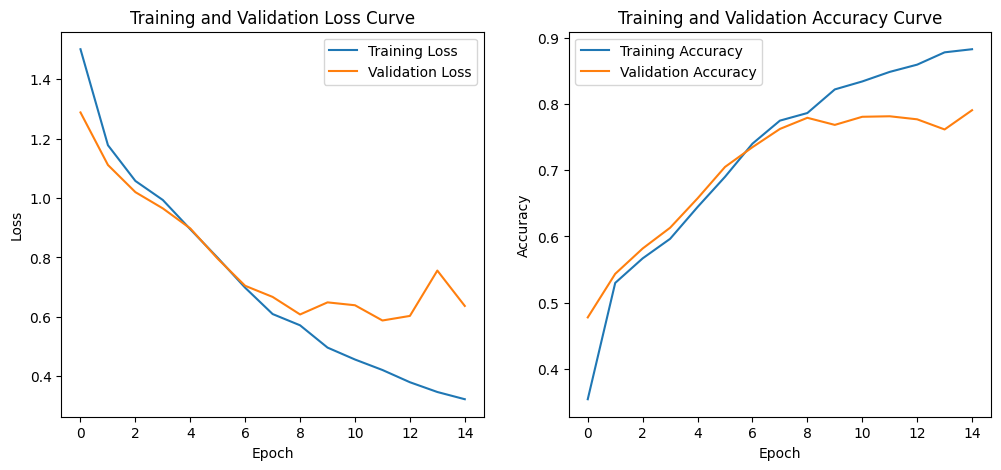

TEST: Accuracy: 0.7915 | Loss: 0.6315 | Recall: 0.7847 | Precision: 0.7818 | F-score: 0.7813



<Figure size 800x800 with 0 Axes>

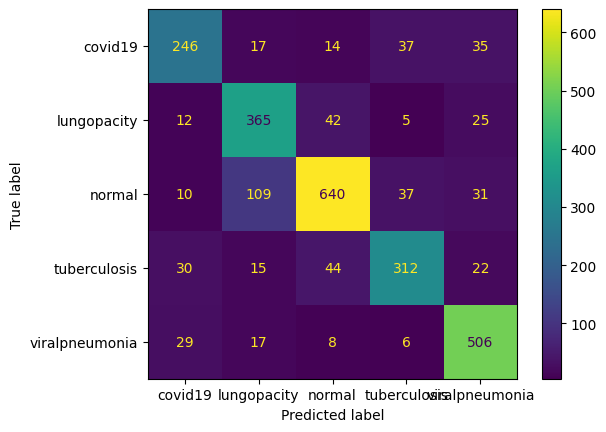

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


Training Model 4 with Learning Rate = 1e-05, Batch Size = 128, Number of Epochs = 15


Epoch 1/15: 100%|██████████| 72/72 [00:33<00:00,  2.16batch/s, Accuracy=0.313, Loss=1.55, Precision=0.0627, Recall=0.2, F1 Score=0.0955]


VALIDATION: Accuracy: 0.3127 | Loss: 1.5194 | Recall: 0.2000 | Precision: 0.0625 | F-score: 0.0953



Epoch 2/15: 100%|██████████| 72/72 [00:33<00:00,  2.14batch/s, Accuracy=0.433, Loss=1.35, Precision=0.372, Recall=0.259, F1 Score=0.2]


VALIDATION: Accuracy: 0.4419 | Loss: 1.2861 | Recall: 0.3511 | Precision: 0.3366 | F-score: 0.2741



Epoch 3/15: 100%|██████████| 72/72 [00:34<00:00,  2.10batch/s, Accuracy=0.52, Loss=1.17, Precision=0.403, Recall=0.313, F1 Score=0.277]


VALIDATION: Accuracy: 0.5260 | Loss: 1.1605 | Recall: 0.4429 | Precision: 0.5134 | F-score: 0.4256



Epoch 4/15: 100%|██████████| 72/72 [00:37<00:00,  1.91batch/s, Accuracy=0.544, Loss=1.11, Precision=0.437, Recall=0.348, F1 Score=0.322]


VALIDATION: Accuracy: 0.5550 | Loss: 1.1260 | Recall: 0.5125 | Precision: 0.5413 | F-score: 0.5024



Epoch 5/15: 100%|██████████| 72/72 [00:37<00:00,  1.90batch/s, Accuracy=0.569, Loss=1.07, Precision=0.463, Recall=0.376, F1 Score=0.358]


VALIDATION: Accuracy: 0.5726 | Loss: 1.0668 | Recall: 0.5022 | Precision: 0.5695 | F-score: 0.5071



Epoch 6/15: 100%|██████████| 72/72 [00:42<00:00,  1.69batch/s, Accuracy=0.59, Loss=1.03, Precision=0.486, Recall=0.399, F1 Score=0.389]


VALIDATION: Accuracy: 0.5894 | Loss: 1.0531 | Recall: 0.5236 | Precision: 0.5939 | F-score: 0.5244



Epoch 7/15: 100%|██████████| 72/72 [00:43<00:00,  1.67batch/s, Accuracy=0.606, Loss=1, Precision=0.504, Recall=0.419, F1 Score=0.414]


VALIDATION: Accuracy: 0.6154 | Loss: 0.9966 | Recall: 0.5810 | Precision: 0.5983 | F-score: 0.5812



Epoch 8/15: 100%|██████████| 72/72 [00:43<00:00,  1.64batch/s, Accuracy=0.623, Loss=0.973, Precision=0.519, Recall=0.437, F1 Score=0.436]


VALIDATION: Accuracy: 0.6216 | Loss: 0.9607 | Recall: 0.5798 | Precision: 0.6002 | F-score: 0.5849



Epoch 9/15: 100%|██████████| 72/72 [00:47<00:00,  1.53batch/s, Accuracy=0.633, Loss=0.945, Precision=0.532, Recall=0.453, F1 Score=0.455]


VALIDATION: Accuracy: 0.6223 | Loss: 0.9678 | Recall: 0.5823 | Precision: 0.6121 | F-score: 0.5789



Epoch 10/15: 100%|██████████| 72/72 [00:48<00:00,  1.50batch/s, Accuracy=0.642, Loss=0.927, Precision=0.542, Recall=0.466, F1 Score=0.471]


VALIDATION: Accuracy: 0.6086 | Loss: 0.9628 | Recall: 0.5326 | Precision: 0.6230 | F-score: 0.5334



Epoch 11/15: 100%|██████████| 72/72 [00:49<00:00,  1.46batch/s, Accuracy=0.647, Loss=0.92, Precision=0.551, Recall=0.478, F1 Score=0.485]


VALIDATION: Accuracy: 0.6346 | Loss: 0.9296 | Recall: 0.5987 | Precision: 0.6193 | F-score: 0.6005



Epoch 12/15: 100%|██████████| 72/72 [00:49<00:00,  1.45batch/s, Accuracy=0.661, Loss=0.887, Precision=0.56, Recall=0.489, F1 Score=0.497]


VALIDATION: Accuracy: 0.6552 | Loss: 0.8912 | Recall: 0.6263 | Precision: 0.6367 | F-score: 0.6298



Epoch 13/15: 100%|██████████| 72/72 [00:54<00:00,  1.32batch/s, Accuracy=0.664, Loss=0.875, Precision=0.567, Recall=0.499, F1 Score=0.508]


VALIDATION: Accuracy: 0.6491 | Loss: 0.9064 | Recall: 0.6352 | Precision: 0.6361 | F-score: 0.6322



Epoch 14/15: 100%|██████████| 72/72 [00:55<00:00,  1.29batch/s, Accuracy=0.666, Loss=0.869, Precision=0.573, Recall=0.508, F1 Score=0.518]


VALIDATION: Accuracy: 0.6529 | Loss: 0.8764 | Recall: 0.6192 | Precision: 0.6406 | F-score: 0.6233



Epoch 15/15: 100%|██████████| 72/72 [00:56<00:00,  1.27batch/s, Accuracy=0.679, Loss=0.839, Precision=0.58, Recall=0.517, F1 Score=0.527]


VALIDATION: Accuracy: 0.6735 | Loss: 0.8631 | Recall: 0.6566 | Precision: 0.6563 | F-score: 0.6526

[1.5467796118034585, 1.3467680124907713, 1.17056827671006, 1.109441105726182, 1.0681338760256442, 1.032258140293057, 1.0035201244218248, 0.9730720036721023, 0.944748033892065, 0.9265420216899689, 0.9201160391462707, 0.8866302162203655, 0.875261171536815, 0.8694676900806225, 0.8392911033348469] [1.5194428721699147, 1.286096511630837, 1.160521454038241, 1.1259940155420098, 1.0668030816845209, 1.0531471132867563, 0.9966034579349949, 0.9606738143375525, 0.967811901452709, 0.962776026229975, 0.929573876230724, 0.8911527723347376, 0.9064392288890454, 0.8763872984717016, 0.8630839916179669]


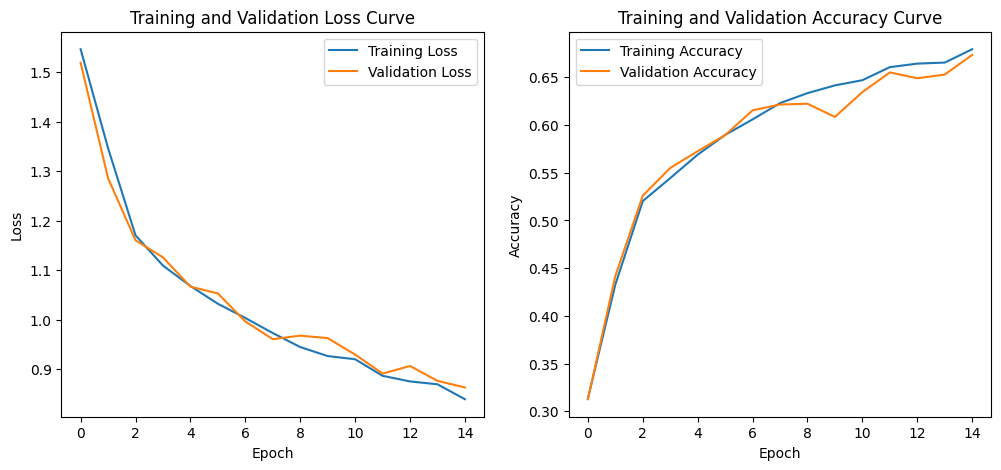

TEST: Accuracy: 0.6863 | Loss: 0.8498 | Recall: 0.6616 | Precision: 0.6721 | F-score: 0.6640



<Figure size 800x800 with 0 Axes>

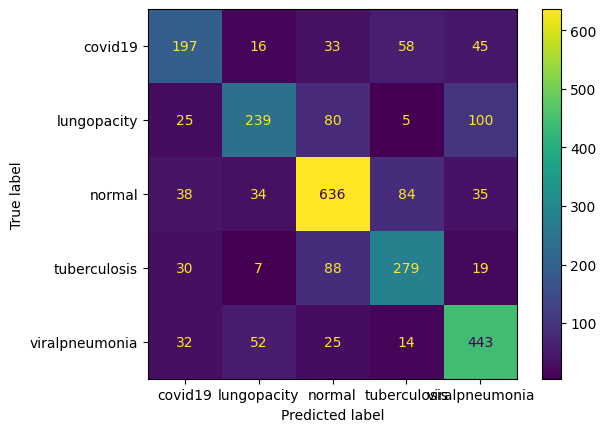

In [ ]:
learning_rate = [0.005, 0.0001, 0.0005, 0.00001]

for i in learning_rate:
  model = torch.hub.load('pytorch/vision:v0.10.0', 'alexnet', pretrained=False)
  model.classifier[6] = nn.Linear(4096, len(dataset.classes))
  model.to(device)

  print("Training Model {} with Learning Rate = {}, Batch Size = {}, Number of Epochs = {}".format(learning_rate.index(i)+1, i, batch_size, num_epochs))
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr = i)

  losses, accuracies, v_accuracies, v_losses = train_model(model, criterion, optimizer, "Tuning_AlexNet", num_epochs)
  #Save Model   
  torch.save(model.state_dict(), "{}{}_alexnet.pth". format(data_path, i))
  #Plotting the Loss and Accuracy Curves
  plot_model_curves(losses, accuracies, v_accuracies, v_losses)
  #Evaluate Model on Test Set 
  evaluate_model(model, test_loader, test_indices, 'TEST', criterion, data_path, "Tuning_AlexNet") 

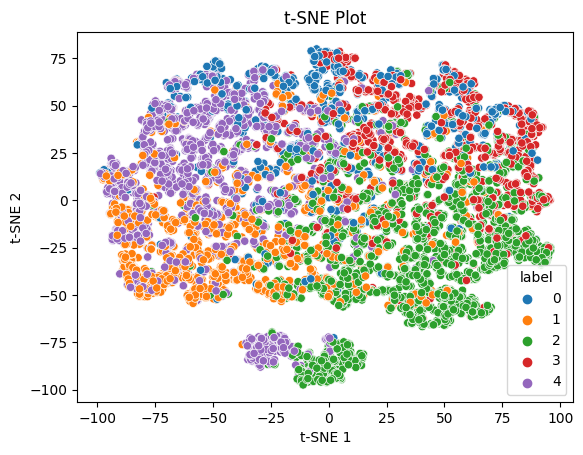

In [12]:
#Obtain TSNE Plot of the dataset with the last model
plot_TSNE(train_loader, device, model)

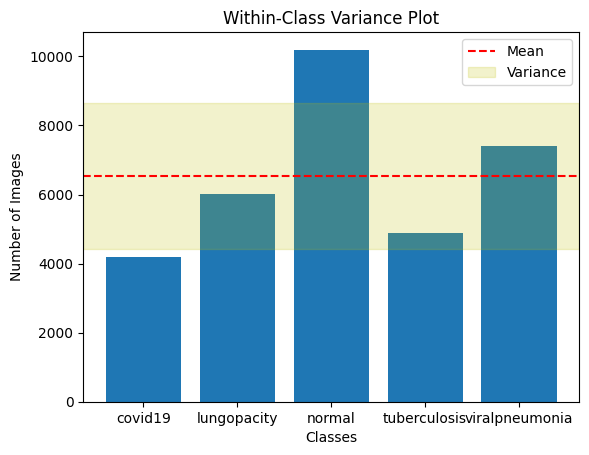

In [13]:
# Get the Within Class Variance
plot_within_class_variance(dataset)